<a href="https://colab.research.google.com/github/horti-stanford/cs230-milestone/blob/main/mathwriting_explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explore data by displaying a few inkml samples and labels. Using code from https://github.com/google-research/google-research/blob/master/mathwriting/mathwriting_code_examples.ipynb
since other generic code seemed to display the images mirror-imaged.



In [1]:
from google.colab import files
uploaded = files.upload()
# Load 3 inkml files from mathwriting-2024-excerpt/train/
# 000aa4c444cba3f2.inkml
# 00bc1c89dff0672e.inkml
# 00bddacfb3de33ce.inkml

Saving 000aa4c444cba3f2.inkml to 000aa4c444cba3f2.inkml
Saving 00bc1c89dff0672e.inkml to 00bc1c89dff0672e.inkml
Saving 00bddacfb3de33ce.inkml to 00bddacfb3de33ce.inkml


In [2]:
#import dataclasses
import json
import os
import pprint
import re

import numpy as np
import matplotlib.pyplot as pl
import matplotlib.patches as mpl_patches

from xml.etree import ElementTree

In [13]:
# Input: Filename
# Output: strokes, annotations

def read_inkml_file(filename: str):
  """Modified simple reader for MathWriting's InkML files."""
  with open(filename, "r") as f:
    root = ElementTree.fromstring(f.read())
  strokes = []
  annotations = {}

  for element in root:
    tag_name = element.tag.removeprefix('{http://www.w3.org/2003/InkML}')
    if tag_name == 'annotation':
      annotations[element.attrib.get('type')] = element.text

    elif tag_name == 'trace':
      points = element.text.split(',')
      stroke_x, stroke_y, stroke_t = [], [], []
      for point in points:
        x, y, t = point.split(' ')
        stroke_x.append(float(x))
        stroke_y.append(float(y))
        stroke_t.append(float(t))
      strokes.append(np.array((stroke_x, stroke_y, stroke_t)))

  return strokes, annotations

def display_ink(strokes, annotations,
    figsize: tuple[int, int]=(15, 10),
    linewidth: int=2,
    color=None):
  """Simple display for a single ink."""
  pl.figure(figsize=figsize)
  for stroke in strokes:
    pl.plot(stroke[0], stroke[1], linewidth=linewidth, color=color)
    pl.title(
        f"{annotations.get('sampleId', '')} -- "
        f"{annotations.get('splitTagOriginal', '')} -- "
        f"{annotations.get('normalizedLabel', annotations['label'])}"
    )
  pl.gca().invert_yaxis()
  pl.gca().axis('equal')

Handwritten sample image: 
Normalized LaTeX label: 
'\\vartheta=-\\frac{log\\frac{\\phi_{\\varsigma_{1}}}{\\phi_{\\varsigma_{2}}}}{log\\frac{\\varsigma_{1}}{\\varsigma_{2}}}'
Handwritten sample image: 
Normalized LaTeX label: 
'k=\\lceil log_{2}n+1\\rceil'
Handwritten sample image: 
Normalized LaTeX label: 
'O(nlogn)'


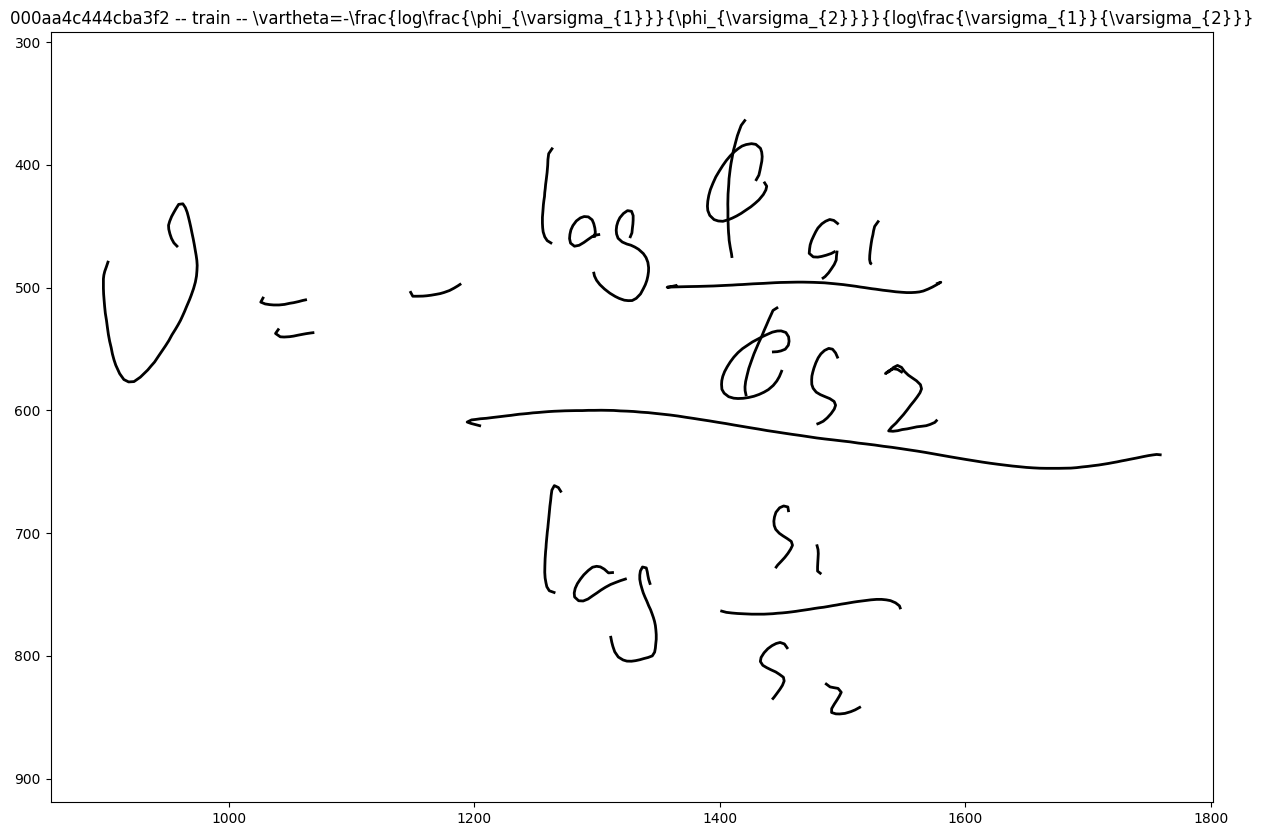

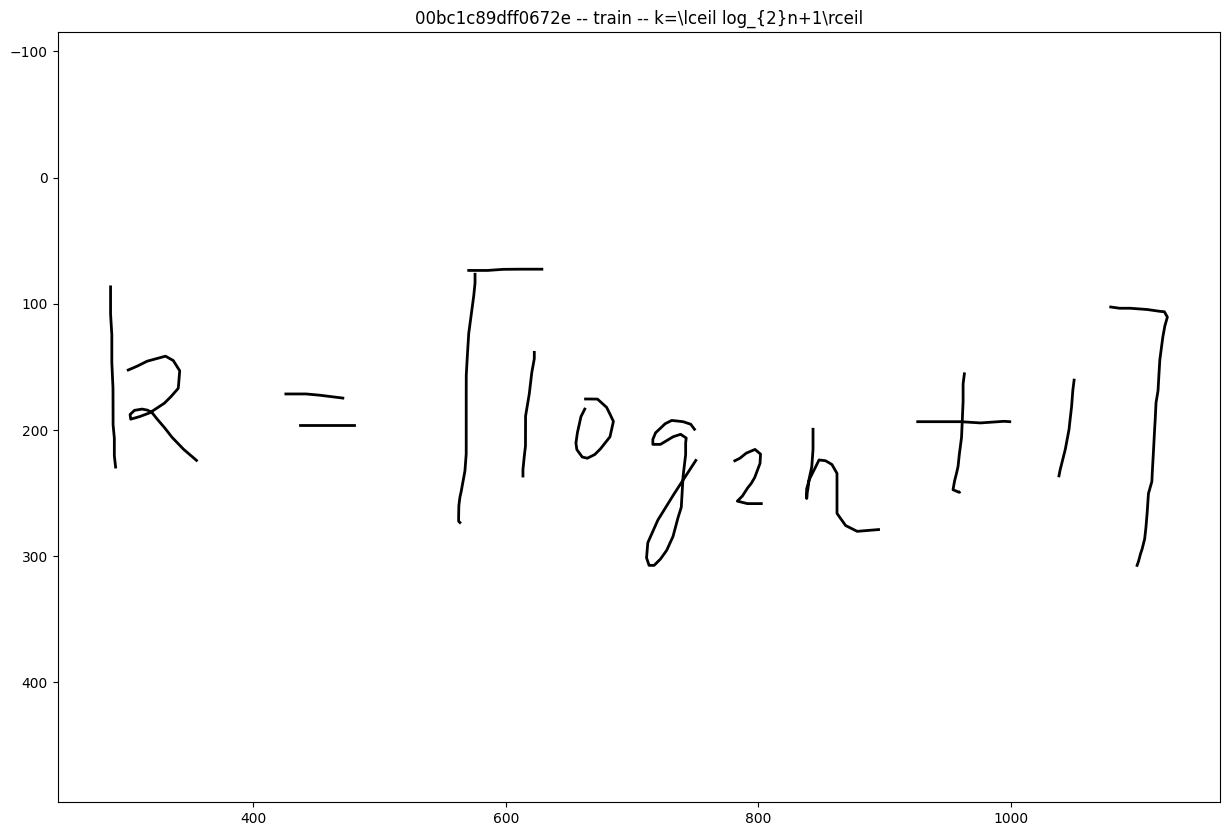

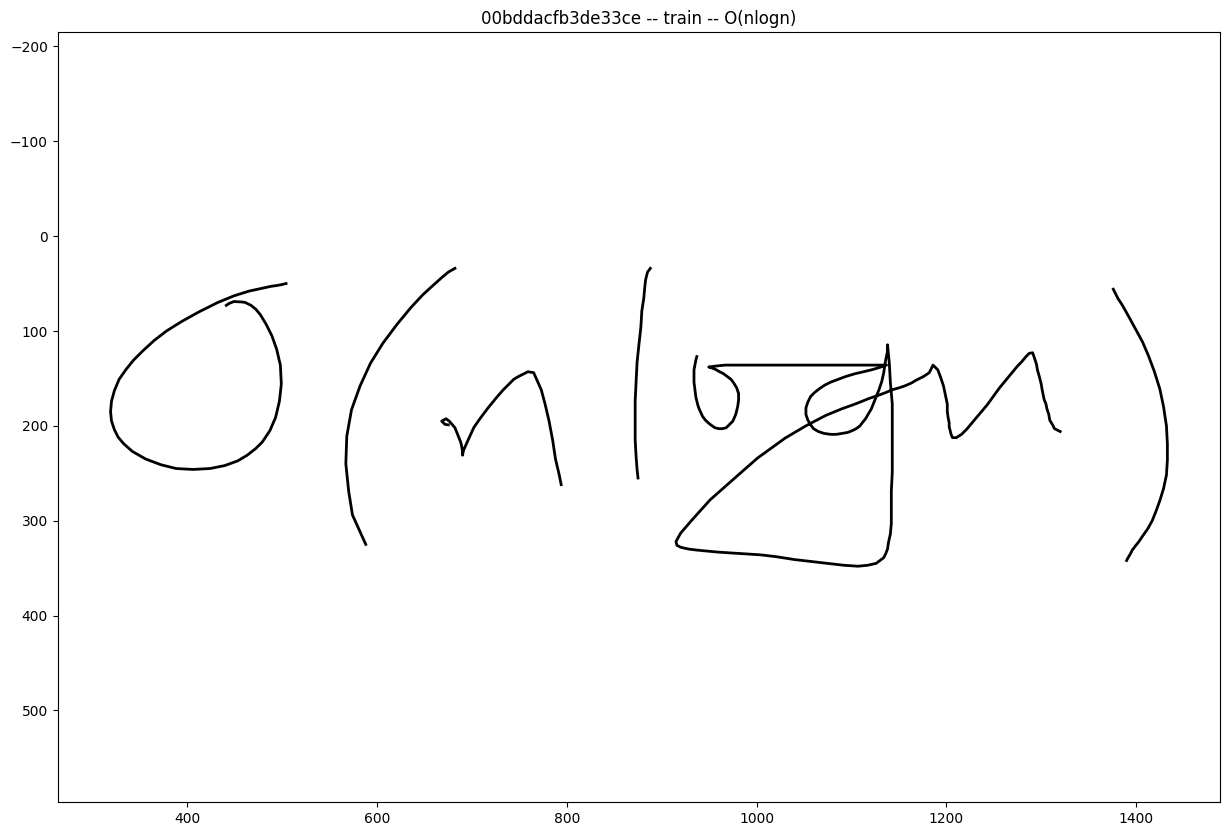

In [25]:
# Assumes these files from mathwriting-2024-excerpt are available
samples = ['000aa4c444cba3f2.inkml', '00bc1c89dff0672e.inkml', '00bddacfb3de33ce.inkml' ]

for sample in samples:
  strokes, annotations = read_inkml_file(sample)
  print("Handwritten sample image: ")
  display_ink(strokes, annotations, color='black')
  print("Normalized LaTeX label: ")
  pprint.pprint(annotations['normalizedLabel'])
